In [1]:
from utils import *

/home/zhongliang/.conda/envs/text2seg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zhongliang/.conda/envs/text2seg/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /home/zhongliang/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


In [2]:
# normalize image
transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )

In [3]:
# input a test image with dog as prompt

text_prompt = ["puppy"]
image = Image.open("dog.jpeg")
image_array = np.array(image)
image_normalized = transform(image_array)

Folder Exsist


/home/zhongliang/.conda/envs/text2seg/lib/python3.8/site-packages/transformers/modeling_utils.py:862: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/zhongliang/.conda/envs/text2seg/lib/python3.8/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


Grounding DINO + SAM


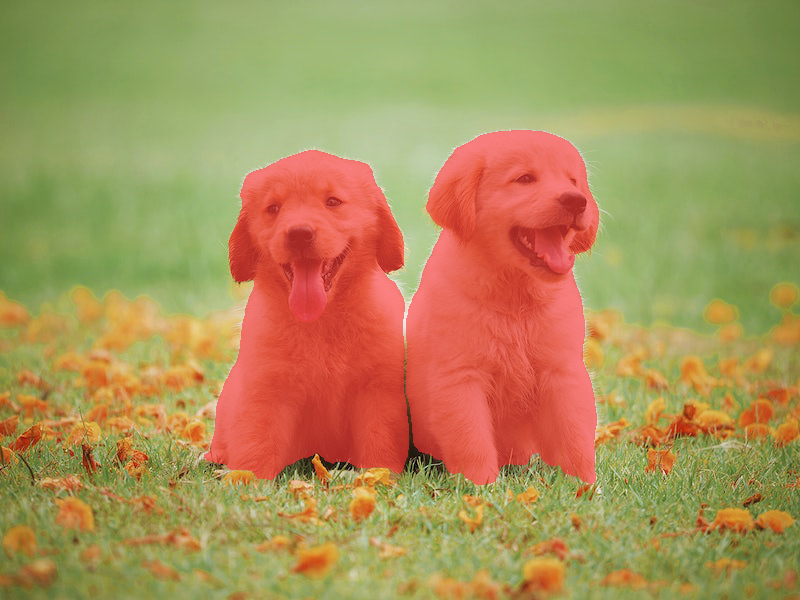

In [4]:
segmented_frame_masks, annotated_frame_with_mask   = VFM_Segmentation(text_prompt, 
                                                                      image_normalized, 
                                                                      image_array, 
                                                                      grounding_dino=True, 
                                                                      CLIPS=False, 
                                                                      CLIP=False,
                                                                      points_per_side=8,
                                                                     )
Image.fromarray(annotated_frame_with_mask)

Folder Exsist
CLIP Surgery + SAM


/home/zhongliang/SAM_RS/github_upload/CLIP_Surgery/clip/clip.py:335: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y = min((idx // w + 0.5) * scale_h, shape[0] - 1)
/home/zhongliang/SAM_RS/github_upload/CLIP_Surgery/clip/clip.py:341: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y = min((idx // w + 0.5) * scale_h, shape[0] - 1)


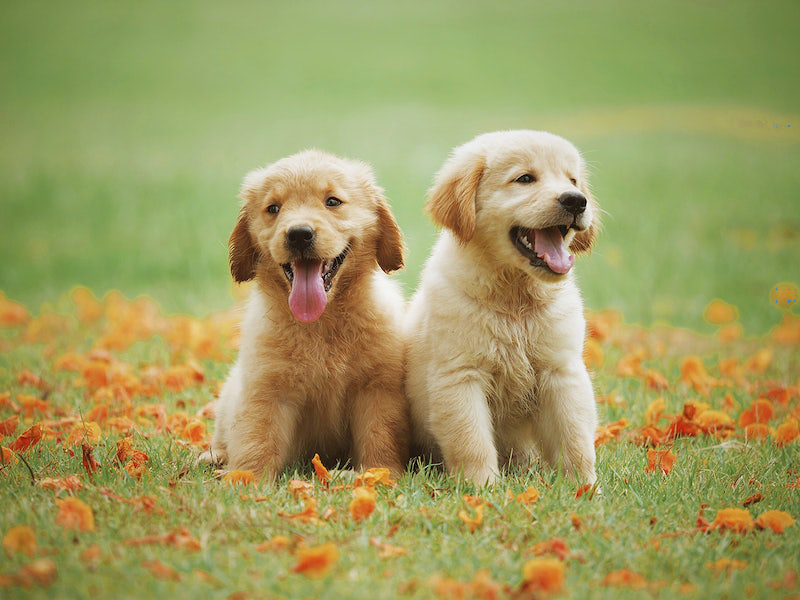

In [5]:
segmented_frame_masks, annotated_frame_with_mask   = VFM_Segmentation(text_prompt, 
                                                                      image_normalized,
                                                                      image_array,  
                                                                      grounding_dino=False, 
                                                                      CLIPS=True, 
                                                                      CLIP=False,
                                                                      points_per_side=8,
                                                                     )
Image.fromarray(annotated_frame_with_mask)

Folder Exsist
Grounding DINO + CLIPS + SAM


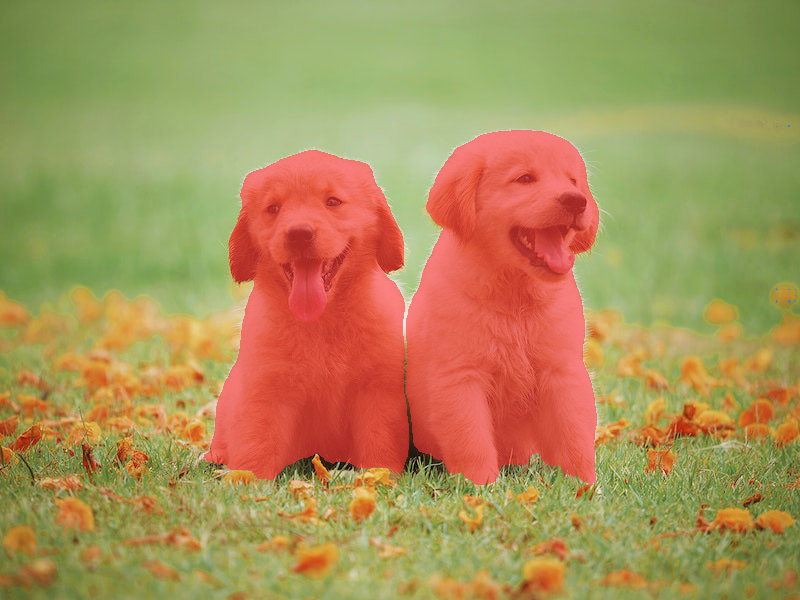

In [6]:
segmented_frame_masks, annotated_frame_with_mask   = VFM_Segmentation(text_prompt, 
                                                                      image_normalized, 
                                                                      image_array, 
                                                                      grounding_dino=True, 
                                                                      CLIPS=True, 
                                                                      CLIP=False,
                                                                      points_per_side=8,
                                                                     )
Image.fromarray(annotated_frame_with_mask)

Folder Exsist
SAM + CLIP


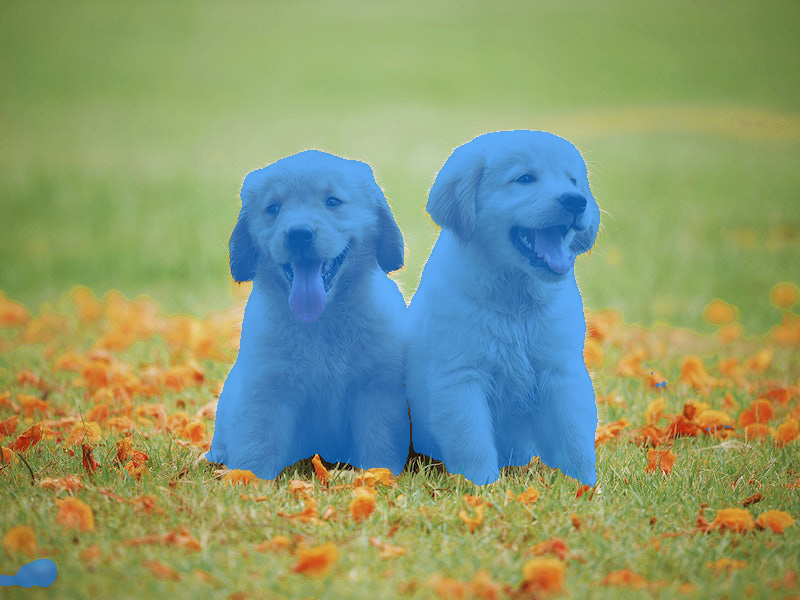

In [7]:
segmented_frame_masks, annotated_frame_with_mask   = VFM_Segmentation(text_prompt, 
                                                                      image_normalized, 
                                                                      image_array, 
                                                                      grounding_dino=False, 
                                                                      CLIPS=False, 
                                                                      CLIP=True,
                                                                      points_per_side=64,
                                                                     )
Image.fromarray(annotated_frame_with_mask)

Folder Exsist
Grounding DINO + CLIPS + SAM + CLIP


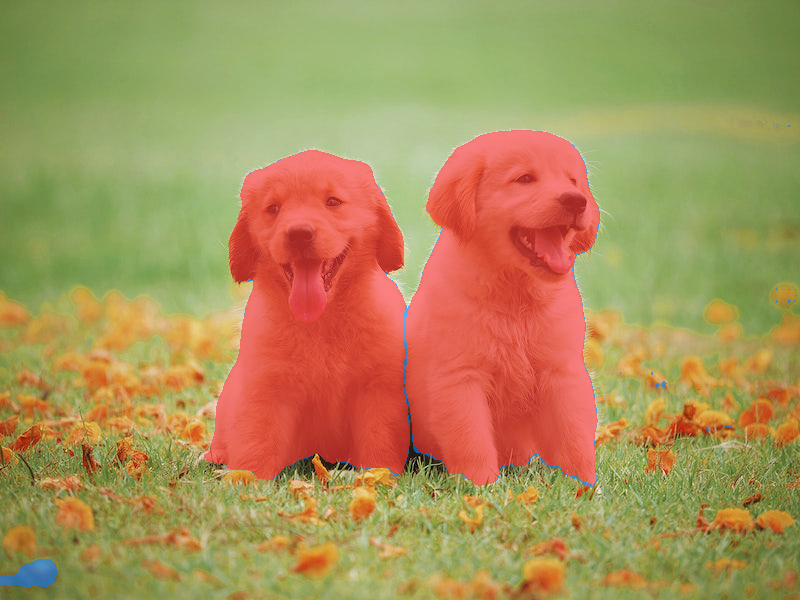

In [8]:
segmented_frame_masks, annotated_frame_with_mask   = VFM_Segmentation(text_prompt, 
                                                                      image_normalized, 
                                                                      image_array, 
                                                                      grounding_dino=True, 
                                                                      CLIPS=True, 
                                                                      CLIP=True,
                                                                      points_per_side=64,
                                                                     )
Image.fromarray(annotated_frame_with_mask)